<a href="https://colab.research.google.com/github/abinarain/MatrixDecompositionForDataScience/blob/main/MDAProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Matrix Decompositions in Data Analysis
## Winter 2021
## Assignment file Project 2 Non Negative Matrix Decomposition
## Name:: Abhishek N. Singh
## Student ID:322079
#
#Date: 13th February 2021
#Email: abhishek.narain@iitdalumni.com
#Description: The script below does NMF analysis as part of the course Matrix Decomposition for Data Analysis at 
#University of Eastern Finland

In [ ]:
#Task 1: ALS vs. multiplicative NMF
#Download the data (news.csv) and the template code files assignment2.{m, py, R} from the course
#Moodle page (provided as a single zip-file assignment2.zip). You can use code files as templates for your
#answers, and you can also find some helper functions and boilerplate code in there.
#Your first task is to implement three versions of the NMF algorithm:
#a) NMF based on alternating least squares
#b) Lee and Seung’s multiplicative NMF algorithm
#c) NMF via gradient descent using Oblique Projected Landweber (OPL) updates
#You can truncate negative values to zero. Your implementations should be reasonably efficient. As a
#convergence criterion, you can stop after 300 iterations. For initial solutions, you can use either matrices
#where elements are sampled uniformly at random form the unit interval, or use scaling based on the input
#matrix. But you have to use the same initial solution generation for all methods.
#The data is a sample of 2000 news articles of the 20-newsgroups dataset.1 Terms have been stemmed
#and very frequent and infrequent words have been removed. The data is given in form of an 2000 × 5136
#document-term matrix; entry (d, w) denotes the term frequency (tf) of word w in document d.
#Run the three NMF algorithms on the news data for k = 20. Compare the reconstruction errors and
#convergence rates. Notice that any two runs of the algorithm might result to very different outcomes,
#depending on the initial W and H. Also, the default 300 iterations might not be enough (or it might be too
#much) for the methods to converge. Play around with the number of re-starts and iterations.
#Analyse the convergence speed of the algorithms. Use either the number of iterations the algorithms take
#to reach error below some reasonable threshold (e.g. error that is less than 95 % of the best error you have
#got), or the wall-clock time it takes for them to reach that level. Is one of the methods clearly better than the
#other? Can you show statistically significantly faster (in iterations or in wall-clock time) convergence times?
#Give at least one plot of convergence rates (iteration or time vs. reconstruction error) for each method.
#Compare also the best reconstruction errors. Does any of the methods give statistically significantly
#lower reconstruction errors over different re-starts? In all these tests, use an appropriate statistical test.
#Based on your experiments, which one of the three methods you consider better for this data and why?
#Hint: The news data is reasonably large. It is advisable to start early enough with solving the assignment as
#the computations need some time to run. It’s also a good idea to start with a smaller sample to make sure
#your code actually works. Make sure you use the same computer if you do any wall-clock tests.

In [ ]:

import numpy as np
from numpy.linalg import svd, norm, lstsq
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score as nmi
from scipy.stats import zscore
from sklearn.decomposition import non_negative_factorization
from sklearn.decomposition import NMF


In [ ]:
## Load the news data
A = np.genfromtxt('news.csv', delimiter=',', skip_header=1)


In [ ]:
## To read the terms, just read the first line of news.csv
with open('news.csv') as f:
    header = f.readline()
    terms = [x.strip('"\n') for x in header.split(',')]

In [ ]:
header

'"aa","aaa","aaron","ab","abandon","abc","abid","abil","abolish","abort","abraham","abroad","absenc","absolut","absorb","abstract","absurd","abund","abus","ac","academ","academi","acceler","access","accessori","accid","accident","accommod","accomod","accompani","accomplish","accord","account","accur","accuraci","accus","achiev","acid","acknowledg","aclu","acquir","acquisit","across","act","action","activ","activist","acut","ad","adam","adapt","adaptec","adaptor","add","addict","addit","addition","adequ","adher","adjust","admin","administ","administr","admir","admiss","admit","admittedli","adob","adopt","adress","adult","advantag","adventur","advertis","advic","advis","advoc","aerospac","affair","affect","affili","affirm","afford","afraid","africa","african","afternoon","afterward","ag","agenc","agenda","agent","aggress","agnost","agreement","agricultur","ah","ahead","ahl","aid","aim","aint","air","aircraft","airlin","airport","aix","aka","al","ala","alabama","alan","alarm","albeit","al

In [ ]:
terms

['aa',
 'aaa',
 'aaron',
 'ab',
 'abandon',
 'abc',
 'abid',
 'abil',
 'abolish',
 'abort',
 'abraham',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'abstract',
 'absurd',
 'abund',
 'abus',
 'ac',
 'academ',
 'academi',
 'acceler',
 'access',
 'accessori',
 'accid',
 'accident',
 'accommod',
 'accomod',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'accur',
 'accuraci',
 'accus',
 'achiev',
 'acid',
 'acknowledg',
 'aclu',
 'acquir',
 'acquisit',
 'across',
 'act',
 'action',
 'activ',
 'activist',
 'acut',
 'ad',
 'adam',
 'adapt',
 'adaptec',
 'adaptor',
 'add',
 'addict',
 'addit',
 'addition',
 'adequ',
 'adher',
 'adjust',
 'admin',
 'administ',
 'administr',
 'admir',
 'admiss',
 'admit',
 'admittedli',
 'adob',
 'adopt',
 'adress',
 'adult',
 'advantag',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'advoc',
 'aerospac',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afraid',
 'africa',
 'african',
 'afternoon',
 'afterward',
 'ag',
 'agenc',
 'agenda',
 'age

In [ ]:
## accelerated-Hierarchical Alternating Least Squares method for NMF (of Cichocki et al.)
W, H, n_iter = non_negative_factorization(A, n_components=2, init='random',solver='cd', random_state=0, verbose='int')

violation: 1.0
violation: 0.27251923733589467
violation: 0.24072632316263282
violation: 0.2078809700385592
violation: 0.16818720181612715
violation: 0.14811056198639957
violation: 0.13610098490809808
violation: 0.12378546274494041
violation: 0.11010883224839288
violation: 0.0958898269787832
violation: 0.08123797040393844
violation: 0.06644315472933053
violation: 0.05227216079631819
violation: 0.0389509451043351
violation: 0.029818742192463808
violation: 0.023300733991371295
violation: 0.018334934976216
violation: 0.014946023627909382
violation: 0.0124962663573199
violation: 0.010672582021491935
violation: 0.009249871744349726
violation: 0.008073936985349025
violation: 0.007086208250261193
violation: 0.00623986713487737
violation: 0.005529109839198194
violation: 0.004910519787189637
violation: 0.0043672433900929395
violation: 0.0038905373109251813
violation: 0.0034675960048718276
violation: 0.0030909532932948715
violation: 0.002764551604580108
violation: 0.002473355716879589
violation: 

In [ ]:
W

array([[0.03307115, 0.05519362],
       [0.03307115, 0.05519362],
       [0.05725836, 0.23708734],
       ...,
       [0.00451627, 0.06861104],
       [0.02050513, 0.16528408],
       [0.03742743, 0.09367861]])

In [ ]:
H

array([[0.04917199, 0.00533622, 0.02454217, ..., 0.00965734, 0.17721158,
        0.00604888],
       [0.02500657, 0.01443274, 0.0110177 , ..., 0.00535039, 0.        ,
        0.00758804]])

In [ ]:
n_iter


60

In [ ]:
#Now I use standerd ALS method
#Now I use the Alternating Least Square updates for W and H given A and an
#initiation random value of W and H which are updated using pseudo inverse and
# then the negative values are truncated. 
# Function that updates W and H using ALS
#LSTSQ: Return the least-squares solution to a linear matrix equation
#rcondfloat, optional Cut-off ratio for small singular values of a. 
#For the purposes of rank determination, singular values are treated as zero 
#if they are smaller than rcond times the largest singular value of a.
#The previous default of -1 will use the machine precision as rcond parameter
def nmf_als(A, W, H):
  # Update H
  # Solve the least squares problem: argmin_H ||WH - A||
  H = lstsq(W, A, rcond = -1)[0] #Note this is solving the same purpose
  # as that of H <- W(pseudo-inverse)*A
  # Set negative elements of H to 0 as we have been given permission for this
  H[H < 0] = 0
  # Update W
  # Solve the least squares problem: argmin_W.T ||H.TW.T - A.T||
  # This will do the same job as W <- A * H(pseudo-inverse)
  W = lstsq(H.T, A.T, rcond = -1)[0].T

  # Set negative elements of W to 0 as we have been given permission for this
  W[W < 0] = 0

  return (W, H)

In [ ]:
#Now let me use the pseudo-inverse formula for updating H and W as in the 
#Lecture slides
def nmf_als2(A, W, H):
  # Update H
  H = np.linalg.pinv(W) @ A #PseudoInverse of W multiplied by A matrix
  #H = ( np.linalg.inv(W.T @ W) @ W.T ) @ A #Note this is solving the same purpose
  # as that of H <- W(pseudo-inverse)*A
  # Set negative elements of H to 0 as we have been given permission for this
  H[H < 0] = 0
  # Update W
  # This will do the same job as W <- A * H(pseudo-inverse)
  W = A @ np.linalg.pinv(H)

  # Set negative elements of W to 0 as we have been given permission for this
  W[W < 0] = 0

  return (W, H)

In [ ]:
## Boilerplate for NMF
def nmf(A, k, optFunc=nmf_als, maxiter=300, repetitions=1):
    (n, m) = A.shape
    bestErr = np.Inf;
    for rep in range(repetitions):
        # Init W and H 
        W = np.random.rand(n, k) 
        H = np.random.rand(k, m)
        errs = [np.nan] * maxiter
        for i in range(maxiter):
            (W, H) = optFunc(A, W, H)
            currErr = norm(A - np.matmul(W, H), 'fro')**2
            errs[i] = currErr
        if currErr < bestErr:
            bestErr = currErr
            bestW = W
            bestH = H
            bestErrs = errs
    return (bestW, bestH, bestErrs)


In [ ]:
## Boilerplate for NMF
def nmf4OPD(A, k, optFunc=nmf_opl, maxiter=300, repetitions=1):
    (n, m) = A.shape
    bestErr = np.Inf;
    for rep in range(repetitions):
        # Init W and H 
        W = np.random.rand(n, k) 
        H = np.random.rand(k, m)
        errs = [np.nan] * maxiter
        for i in range(maxiter):
            H = optFunc(A, W, H)
            W = (optFunc(A.T, H.T, W.T)).T
            currErr = norm(A - np.matmul(W, H), 'fro')**2
            errs[i] = currErr
        if currErr < bestErr:
            bestErr = currErr
            bestW = W
            bestH = H
            bestErrs = errs
    return (bestW, bestH, bestErrs)

In [ ]:
#Now I call the function for NMF using ALS using k the inner dimensions of the matrices as 20
W_Als, H_Als, Errs = nmf(A, 20, optFunc=nmf_als, maxiter=300, repetitions=1) 

In [ ]:
W_Als

array([[0.00000000e+00, 5.36832812e+04, 1.51695360e+05, ...,
        2.26715840e+03, 4.75643351e+01, 3.66827148e+02],
       [0.00000000e+00, 5.36832812e+04, 1.51695360e+05, ...,
        2.26715840e+03, 4.75643351e+01, 3.66827148e+02],
       [0.00000000e+00, 0.00000000e+00, 9.89686019e+04, ...,
        0.00000000e+00, 1.57844802e+02, 9.20175779e+02],
       ...,
       [2.50108159e+03, 0.00000000e+00, 6.52876130e+04, ...,
        7.78437432e+02, 3.50672631e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.08109506e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.48839300e+03, 3.68003997e+05, 6.83121908e+04, ...,
        1.81694599e+03, 2.04186027e+01, 0.00000000e+00]])

In [ ]:
H_Als

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.08937529e-09, 2.47064686e-09, ...,
        3.39889290e-10, 0.00000000e+00, 3.70807547e-10],
       [0.00000000e+00, 1.09031138e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.89609209e-08, 0.00000000e+00, ...,
        3.03952823e-08, 0.00000000e+00, 4.73472849e-08],
       [0.00000000e+00, 0.00000000e+00, 1.32788328e-06, ...,
        4.70997692e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
Errs


[85182.10676619742,
 83616.6448913786,
 81952.1341634699,
 80546.1841666258,
 79321.20360263529,
 78355.18044490714,
 77701.96829336142,
 77305.0583695591,
 77058.22239904743,
 76903.24740837527,
 76810.69894124746,
 76755.86267639702,
 76723.63472773657,
 76704.04801425025,
 76691.17648775602,
 76681.86359333913,
 76674.34678332073,
 76667.59498509427,
 76660.97135009947,
 76654.33422819509,
 76647.37204456191,
 76639.5318287312,
 76630.49758766168,
 76620.87056200222,
 76610.53095575156,
 76601.23082743767,
 76593.82027487933,
 76587.77950878051,
 76582.38525395237,
 76577.86055854415,
 76573.98024758646,
 76570.42958045888,
 76567.08452327587,
 76564.04137089258,
 76561.18417166725,
 76558.55141191832,
 76556.08978282193,
 76553.85142052994,
 76551.77902768458,
 76549.94232194188,
 76548.33626505682,
 76546.84942204069,
 76545.53172254412,
 76544.35967666785,
 76543.29475837431,
 76542.4050569114,
 76541.66813445774,
 76540.99940762263,
 76540.39885092033,
 76539.85239706321,
 76539

In [ ]:
#Now I call the function for NMF using ALS using k the inner dimensions of the matrices as 20
W_Als2, H_Als2, Errs2 = nmf(A, 20, optFunc=nmf_als2, maxiter=300, repetitions=1) 

In [ ]:
W_Als2

array([[8.23163877e+00, 0.00000000e+00, 6.67520277e+01, ...,
        0.00000000e+00, 1.20965386e+03, 3.68184923e+05],
       [8.23163877e+00, 0.00000000e+00, 6.67520277e+01, ...,
        0.00000000e+00, 1.20965386e+03, 3.68184923e+05],
       [3.69144726e-01, 0.00000000e+00, 0.00000000e+00, ...,
        7.57048611e+04, 1.58337525e+03, 2.34582950e+05],
       ...,
       [0.00000000e+00, 1.81265431e+00, 0.00000000e+00, ...,
        7.93260065e+03, 1.21266202e+04, 1.50600888e+05],
       [5.34851647e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.56168437e+04, 0.00000000e+00, 4.41802429e+05],
       [2.37164754e+00, 8.46667693e+00, 1.68180208e+02, ...,
        0.00000000e+00, 9.19714483e+03, 1.71483930e+05]])

In [ ]:
H_Als2

array([[0.00000000e+00, 4.89786043e-06, 2.16548256e-05, ...,
        0.00000000e+00, 8.38482810e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.26830089e-07, ...,
        3.23081754e-06, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.42845853e-06, 2.63628982e-06, ...,
        0.00000000e+00, 9.13364306e-05, 6.06994008e-06],
       ...,
       [8.20709485e-08, 0.00000000e+00, 4.73772704e-08, ...,
        0.00000000e+00, 0.00000000e+00, 7.84238515e-09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.41051292e-09, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
Errs2

[85217.16006829038,
 83840.73212012167,
 81819.35911050477,
 80513.43904774348,
 79605.11161635778,
 78852.53214085764,
 78182.48063342995,
 77656.38437764293,
 77297.66179815157,
 77064.7428595797,
 76895.20177714239,
 76761.22476245667,
 76669.572786022,
 76611.88356937736,
 76577.21181756812,
 76557.33046510823,
 76546.40873379816,
 76540.08725247109,
 76535.75123108379,
 76532.33132120401,
 76529.16426225741,
 76525.88051694285,
 76522.12963846799,
 76517.75527128721,
 76512.56519453204,
 76506.64101122702,
 76500.33057908677,
 76494.13313274708,
 76488.59325597188,
 76483.9779846897,
 76480.50314534774,
 76478.0573455771,
 76476.32948320142,
 76475.14954529234,
 76474.36476819759,
 76473.87444242527,
 76473.58147716729,
 76473.4345545952,
 76473.35795525378,
 76473.3180964813,
 76473.2961115125,
 76473.28277581497,
 76473.27420747037,
 76473.26507770795,
 76473.25319821772,
 76473.24118693471,
 76473.22717302508,
 76473.21121037382,
 76473.19408580431,
 76473.17585450698,
 76473.1

In [ ]:
#Lee and Seung's Multiplicative update

In [ ]:

def LeeSeungMU(A, k, delta, num_iter, init_W=None, init_H=None, print_enabled=False):
    
    
    if print_enabled:
        print('Frobenius norm ||A - WH||_F')
        

    # Initialize W and H if we do not pass an initial value for W and H 
    if init_W is None:
        W = np.random.rand(np.size(A, 0), k)
    else:
        W = init_W

    if init_H is None:
        H = np.random.rand(k, np.size(A, 1))
    else:
        H = init_H
    errs = [np.nan] * num_iter
    # Decompose the input matrix
    for n in range(num_iter):
        # Note that .T is used to do a transpose of the matrix
        # Update H  
        #Numerator
        W_TA = W.T @ A # @= and @ are new operators introduced in Python 3.5 performing matrix multiplication. 
        #Denominator
        W_TWH = W.T @ W @ H + delta
        #Now multiplying each element at a time for H 
        for i in range(np.size(H, 0)): #Iterate through rows of H matrix
            for j in range(np.size(H, 1)): #Iterate throug columns of H matrix
                H[i, j] = H[i, j] * W_TA[i, j] / W_TWH[i, j] #Update every element of H matrix

        # Update W
        AH_T = A @ H.T #This is the numerator where H transpose is post multiplied to A matrix
        WHH_T =  W @ H @ H.T + delta #This is the denominator
        
        #Now multiplying each element at a time for W 
        for i in range(np.size(W, 0)): #Here I count the number of rows in W matrix
            for j in range(np.size(W, 1)): #Iterate through number of columns in W matrix
                W[i, j] = W[i, j] * AH_T[i, j] / WHH_T[i, j] #Update every element by multiplicative factor

        if print_enabled:
            errs[n] = np.linalg.norm(A - W @ H, 'fro')
            print("iteration " + str(n + 1) + ": " + str(errs[n]))

    return (W, H, errs)

In [ ]:
W_ls, H_ls, errs = LeeSeungMU(A, 20, 0.000001, 300, init_W=None, init_H=None, print_enabled=True)

Applying multiplicative updates on the input matrix...
---------------------------------------------------------------------
Frobenius norm ||A - WH||_F

iteration 1: 291.372849292648
iteration 2: 290.5318342387004
iteration 3: 290.09267037639114
iteration 4: 289.46640783104186
iteration 5: 288.5436977375252
iteration 6: 287.33334941258295
iteration 7: 286.03847357215324
iteration 8: 284.8270725332611
iteration 9: 283.7450440613067
iteration 10: 282.78444128812185
iteration 11: 281.92817984638333
iteration 12: 281.1646921695494
iteration 13: 280.49008796080994
iteration 14: 279.9036538007889
iteration 15: 279.4024954465915
iteration 16: 278.98027237443745
iteration 17: 278.62721519150296
iteration 18: 278.33093967945626
iteration 19: 278.08000653982634
iteration 20: 277.8646894094484
iteration 21: 277.6775480290415
iteration 22: 277.51647430896537
iteration 23: 277.37926166733024
iteration 24: 277.26147301676855
iteration 25: 277.1606248304999
iteration 26: 277.0752703282367
iteration 

In [ ]:
#We note that 300 iterations does not seem sufficient

In [ ]:
W_ls, H_ls, errs = LeeSeungMU(A, 20, 0.000001, 3000, init_W=None, init_H=None, print_enabled=True)

Applying multiplicative updates on the input matrix...
---------------------------------------------------------------------
Frobenius norm ||A - WH||_F

iteration 1: 291.383967514414
iteration 2: 290.554693504243
iteration 3: 290.1227321381683
iteration 4: 289.5052235741686
iteration 5: 288.6421327207453
iteration 6: 287.5893268304609
iteration 7: 286.48432446457724
iteration 8: 285.4357118235925
iteration 9: 284.4802073929421
iteration 10: 283.6149607237866
iteration 11: 282.825126166373
iteration 12: 282.09791172513883
iteration 13: 281.427997601029
iteration 14: 280.81793896296693
iteration 15: 280.27273322166195
iteration 16: 279.7960298753639
iteration 17: 279.38406163648403
iteration 18: 279.03256336220915
iteration 19: 278.73601117738457
iteration 20: 278.48804853657725
iteration 21: 278.28098374874065
iteration 22: 278.1080387791929
iteration 23: 277.9639609165554
iteration 24: 277.8437640458011
iteration 25: 277.74266737996254
iteration 26: 277.65657000914024
iteration 27: 27

In [ ]:
#OPD Oblique Algorithm
def nmf_als2(A, W, H):
  # Update H
  H = np.linalg.pinv(W) @ A #PseudoInverse of W multiplied by A matrix
  #H = ( np.linalg.inv(W.T @ W) @ W.T ) @ A #Note this is solving the same purpose
  # as that of H <- W(pseudo-inverse)*A
  # Set negative elements of H to 0 as we have been given permission for this
  H[H < 0] = 0
  # Update W
  # This will do the same job as W <- A * H(pseudo-inverse)
  W = A @ np.linalg.pinv(H)

  # Set negative elements of W to 0 as we have been given permission for this
  W[W < 0] = 0

  return (W, H)

In [ ]:
#The multiplicative update seems to be stuck at local minima as there are no major update in the drop in the forbenius score of the
#difference between A and the WH matrix product.

In [ ]:
def nmf_opl(A, W, H):
  # Update H
  # Get step by NetaH
  NetaH = np.diag(1 / np.sum( (W.T @ W), axis = 1)) #Doing Row Sum and getting 
  #the reciprocal and then creating a diagonal matrix
  G = ( W.T @ W @ H ) - ( W.T @ A ) #This is the gradient matrix
  H = H - ( NetaH @ G ) #Updating H by NetaH steps times G
  # Set negative elements of H to 0 as we have been given permission for this
  H[H < 0] = 0
  # Update W
  # Get the step by NetaG
  #NetaW = np.diag(1 / np.sum( (H.T @ H), axis = 1)) #Doing Row Sum and getting
  # the reciprocal then getting the diagonal matrix
  #G = H.T @ ( ( H @ W) -  A ) #This is the gradient matrix
  #W = W - ( NetaW @ G )

  # Set negative elements of W to 0 as we have been given permission for this
  #W[W < 0] = 0

  return (H)

In [ ]:
W_Opl, H_Opl, ErrsOpl = nmf4OPD(A, 20, optFunc=nmf_opl, maxiter=300, repetitions=1) 

In [ ]:
W_Opl

array([[0.0588494 , 0.01406295, 0.        , ..., 0.0113383 , 0.        ,
        0.00762425],
       [0.0588494 , 0.01406295, 0.        , ..., 0.0113383 , 0.        ,
        0.00762425],
       [0.30930533, 0.        , 0.        , ..., 0.        , 0.        ,
        0.07344962],
       ...,
       [0.0455158 , 0.        , 0.0456273 , ..., 0.        , 0.        ,
        0.01243681],
       [0.21164984, 0.        , 0.        , ..., 0.        , 0.01045379,
        0.03442589],
       [0.01578571, 0.05260894, 0.03552509, ..., 0.        , 0.01631969,
        0.        ]])

In [ ]:
H_Opl

array([[0.07946445, 0.        , 0.00384335, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00352446, ..., 0.        , 0.27437672,
        0.00754458],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00135794, ..., 0.        , 0.        ,
        0.00151373],
       [0.        , 0.        , 0.00332727, ..., 0.00092763, 0.        ,
        0.        ]])

In [ ]:
ErrsOpl

[898763.3904976418,
 145881.47577903187,
 93964.98716273876,
 87241.52369339103,
 85483.52546056868,
 84791.60273360494,
 84379.35000946555,
 84040.95259007587,
 83698.90474228523,
 83330.36209950666,
 82938.29084901158,
 82541.34004442778,
 82151.08286180315,
 81770.0348045291,
 81400.10000966121,
 81044.39336254937,
 80710.9799187239,
 80403.86808857243,
 80123.5164878162,
 79866.1666225426,
 79630.81185405033,
 79416.14422544569,
 79218.84627787047,
 79036.2348388208,
 78867.2045046235,
 78708.42505279668,
 78558.51803646432,
 78418.3971938782,
 78287.24386779325,
 78163.33941629724,
 78046.36967551596,
 77935.45115784755,
 77829.41854127873,
 77727.53907398372,
 77629.5775874232,
 77535.73736599802,
 77446.31032581982,
 77361.78195308505,
 77282.43099371942,
 77208.68462266507,
 77140.71307280565,
 77078.63509903819,
 77022.40303278135,
 76971.7461932356,
 76926.29538610019,
 76885.48434997287,
 76848.68953266036,
 76815.46464685732,
 76785.30507040533,
 76757.91131519804,
 76732.7

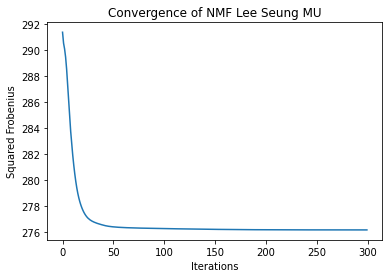

In [ ]:
## To show the per-iteration error of Lee Seung Multiplicative Update
plt.plot(errs)
plt.xlabel('Iterations')
plt.ylabel('Squared Frobenius')
plt.title('Convergence of NMF Lee Seung MU')
plt.show()

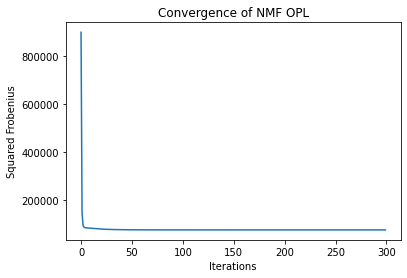

In [ ]:
## To show the per-iteration error of OPL
plt.plot(ErrsOpl)
plt.xlabel('Iterations')
plt.ylabel('Squared Frobenius')
plt.title('Convergence of NMF OPL')
plt.show()

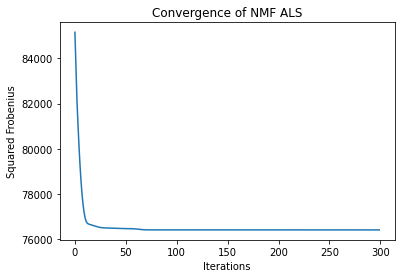

In [ ]:
## To show the per-iteration error of ALS
plt.plot(Errs2)
plt.xlabel('Iterations')
plt.ylabel('Squared Frobenius')
plt.title('Convergence of NMF ALS')
plt.show()

In [ ]:
#Opinion: The method of Multiplicative Update by Lee and Seung gives the least error 
# in Forbenius norm between the matrix A and its factors W and H, and so it can be preferred.
# However, the steepest descent for convergence was seen in OPL.  

In [ ]:
# Test script 2D array   
arr = [[14, 17, 12, 33, 44],    
       [15, 6, 27, 8, 19],   
       [23, 2, 54, 1, 4,]] 

In [ ]:
print("Diagonal Matrix of 1 / RowSums: ", np.diag (1 / np.sum(arr, axis = 1)))

Diagonal Matrix of 1 / RowSums:  [[0.00833333 0.         0.        ]
 [0.         0.01333333 0.        ]
 [0.         0.         0.01190476]]


In [ ]:
#Task 2: Analysing the data
#In this task we try to analyse the news data. Before proceeding further, normalize the data such that
#the sum of all entries in the data equals 1. Then use one of the methods you implemented in the first
#task to find k = 20 NMF of the data and study the top-10 terms of the right factor matrix H. Can you
#infer some “topics” based on these terms? Recall that the terms are stemmed. The topics can be very
#broad (e.g. “terms associated with sports”) and they might not be the ones of the newsgroups. Also,
#some factors might not correspond to any sensible topic. Argue why (or why not) you think the factors
#correspond to the topics you claim they do.
#Repeat the analysis with k = 5, 14, 32, 40. How do the results change with increased k? Can you name
#the single best rank for this data?
#Repeat the analysis, but this time using the generalized K–L divergence optimizing version of NMF
#(provided in utils.R). Do the results change? Are they better or worse? Is a different k better with K–L
#divergence than with Euclidean distance?


In [ ]:
## Normalise the data before applying the NMF algorithms
B = A/sum(sum(A)) # 

In [ ]:
W_lsNorm, H_lsNorm, errsNorm = LeeSeungMU(B, 20, 0.000001, 300, init_W=None, init_H=None, print_enabled=True)

Applying multiplicative updates on the input matrix...
---------------------------------------------------------------------
Frobenius norm ||A - WH||_F

iteration 1: 0.0033537209884522546
iteration 2: 0.0033537225766292833
iteration 3: 0.003353722576629296
iteration 4: 0.003353722576629296
iteration 5: 0.003353722576629296
iteration 6: 0.003353722576629296
iteration 7: 0.003353722576629296
iteration 8: 0.003353722576629296
iteration 9: 0.003353722576629296
iteration 10: 0.003353722576629296
iteration 11: 0.003353722576629296
iteration 12: 0.003353722576629296
iteration 13: 0.003353722576629296
iteration 14: 0.003353722576629296
iteration 15: 0.003353722576629296
iteration 16: 0.003353722576629296
iteration 17: 0.003353722576629296
iteration 18: 0.003353722576629296
iteration 19: 0.003353722576629296
iteration 20: 0.003353722576629296
iteration 21: 0.003353722576629296
iteration 22: 0.003353722576629296
iteration 23: 0.003353722576629296
iteration 24: 0.003353722576629296
iteration 25:

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H_lsNorm[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

zx	0.0
flag	0.0
faulti	0.0
favor	0.0
favorit	0.0
favour	0.0
fax	0.0
fbi	0.0
fear	0.0
feasibl	0.0


In [ ]:
W_OplNorm, H_OplNorm, ErrsOplNorm = nmf4OPD(B, 20, optFunc=nmf_opl, maxiter=300, repetitions=1) 

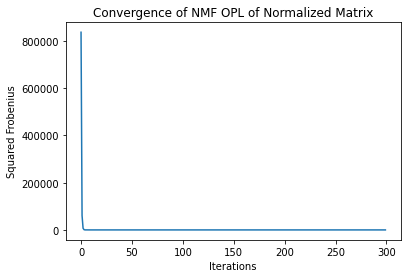

In [ ]:
## To show the per-iteration error of Normalized Matrix using Opl Norm
plt.plot(ErrsOplNorm)
plt.xlabel('Iterations')
plt.ylabel('Squared Frobenius')
plt.title('Convergence of NMF OPL of Normalized Matrix')
plt.show()

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H_OplNorm[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

research	0.0013900892406648593
studi	0.001254823480177067
involv	0.0012051778489858681
produc	0.0012019477678429902
test	0.001195915117052204
steve	0.0011683576516541704
food	0.0011458134957895271
scienc	0.0010981295920362778
certainli	0.0010923572989677587
theyr	0.0010574501304276213


**The topic over here seems to correspond to 'Study, Research, Tests, Production certainty of Food Science in which Steve was involved'.**

In [ ]:
W_OplNormk5, H_OplNormk5, ErrsOplNormk5 = nmf4OPD(B, 5, optFunc=nmf_opl, maxiter=300, repetitions=1) 

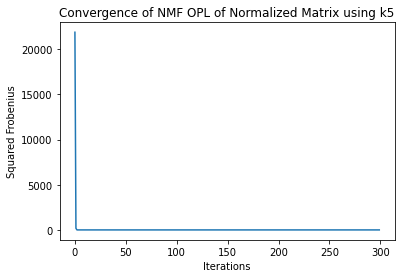

In [ ]:
## To show the per-iteration error of Normalized Matrix using Opl Norm
plt.plot(ErrsOplNormk5)
plt.xlabel('Iterations')
plt.ylabel('Squared Frobenius')
plt.title('Convergence of NMF OPL of Normalized Matrix using k5')
plt.show()

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H_OplNormk5[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

dod	0.01304626192315331
hit	0.012948369843906241
night	0.012679479333495084
final	0.01210720912289488
ride	0.012070359760875608
fan	0.01173622885706559
flame	0.011519650668950542
third	0.011247237522066775
sign	0.011218172386860046
watch	0.01114902272117406


**The topic could be "Watch the 3rd sign on final night in a ride before getting hit by fan which can cause flame"**

In [ ]:
W_OplNormk14, H_OplNormk14, ErrsOplNormk14 = nmf4OPD(B, 14, optFunc=nmf_opl, maxiter=300, repetitions=1) 

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H_OplNormk14[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

dod	0.0040644998715529315
bike	0.003767759796129224
ride	0.003739492296791915
form	0.0033012525743903337
o	0.0032793419103050803
repli	0.0032317456826937655
white	0.0031831419642362217
member	0.0031672129979889315
black	0.003158826470600751
her	0.00313022945009704


**The topic could be "Bike ride by while and black members"**

In [ ]:
W_OplNormk32, H_OplNormk32, ErrsOplNormk32 = nmf4OPD(B, 32, optFunc=nmf_opl, maxiter=300, repetitions=1) 

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H_OplNormk32[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

w	0.006319364677335228
letter	0.00569042217993033
research	0.003214382500292509
unit	0.003125902553901141
field	0.003120812814344103
radio	0.0031134338071512105
signal	0.0031071642685573915
carri	0.003100632703375697
satellit	0.003067537562199425
green	0.0030493075271397227


**The topic could be "Research starting with letter W at a Unit has satellite signal on radio at green field"**

In [ ]:
W_OplNormk40, H_OplNormk40, ErrsOplNormk40 = nmf4OPD(B, 40, optFunc=nmf_opl, maxiter=300, repetitions=1) 

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H_OplNormk40[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

american	0.007393146728490762
canada	0.0056170390752352225
pai	0.004922166656812878
fall	0.004658560296222157
insur	0.004461019974753383
capit	0.0043863070117427065
l	0.004369751177667155
jet	0.004336097330169536
winnipeg	0.004288762147502469
canadian	0.0041469218745822534


**The topic could be "Canadian and American capital jet cost at Winnipeg during fall term and their insurance"**

With change in K the meanings change drastically. The best choice could be k=5 given that each words then have a much higher frequency. But then this is because k is small. Lets try with k =2 for instance. 

In [ ]:
W_OplNormk2, H_OplNormk2, ErrsOplNormk2 = nmf4OPD(B, 2, optFunc=nmf_opl, maxiter=300, repetitions=1) 

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H_OplNormk2[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

copi	1.1134448203787597
space	1.0797120251560508
version	1.0726412393632974
local	1.0690524918343676
process	1.0570101243631334
speed	1.0214119863477145
research	0.9884434202321986
fax	0.9875237079862079
code	0.9762734615937045
special	0.9741200914346357


**So we see that with decrease in k value, the frequency of each words increases. The best k rank to be chosen is very subjective. Typically, what can be done is that we can remove some elements from the A matrix and then calculate its factors W and H. Then, we can see that which of the W and H obtained via various values of k, help us get back the missing value in A. This would be computationally very expensive. However, in our case, the ground truth has been provided. So, we can look for that k value for which the ground truth can be obtained using the k that suits the best.**

In [ ]:
import csv
with open('news_ground_truth.txt', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)


['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['1']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2']
['2'

In [ ]:
#Looks like we dont get much information from ground truth file, and so we cannot
#much of comment about the apt value for 'k'.

In [ ]:
!pip install nimfa

     |████████████████████████████████| 4.7MB 10.2MB/s 


In [ ]:
#import nimfa #This package can be used to get K-L divergence and Euclidian divergence

In [ ]:
#However, to get matrix decomposition, into W and H, we used K-L beta loss k=2
model = NMF(n_components=2, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)

In [ ]:
W = model.fit_transform(B)

In [ ]:
W

array([[5.41283539e-04, 7.88799971e-51],
       [5.41283539e-04, 5.90864478e-51],
       [6.11155937e-04, 3.23417623e-04],
       ...,
       [2.16767686e-04, 1.40238583e-04],
       [8.44930402e-04, 2.91016693e-13],
       [2.67390071e-04, 3.11778436e-04]])

In [ ]:
H = model.components_

In [ ]:
H

array([[1.45508557e-04, 5.06059181e-05, 9.75841156e-05, ...,
        0.00000000e+00, 1.05358003e-04, 0.00000000e+00],
       [5.92652342e-05, 8.80654267e-05, 1.60276597e-04, ...,
        1.34059736e-04, 0.00000000e+00, 9.57569544e-05]])

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

american	0.0018803877126687266
countri	0.0016539133943072333
night	0.0015895654438377463
team	0.0014938084893962613
war	0.001417202925355711
carri	0.001408754744496
pass	0.0013910961677925647
stop	0.0013076769021360967
men	0.0013015045671533108
dod	0.0012831431896096089


**So using K-L divergence for matrix factorization we get a term that states about "American night for teams in war that stop other men"**

In [ ]:
#However, to get matrix decomposition, into W and H, we used K-L beta loss now K =5
model = NMF(n_components=5, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)

In [ ]:
W = model.fit_transform(B)

In [ ]:
H = model.components_

In [ ]:
W

array([[1.13351782e-27, 7.65991888e-04, 1.72962033e-43, 2.45923221e-46,
        4.27828755e-27],
       [1.13351784e-27, 7.65991888e-04, 1.58786074e-43, 2.45681439e-46,
        4.27828170e-27],
       [9.02963077e-34, 3.37239795e-04, 1.14629632e-03, 4.50373783e-22,
        9.62056234e-18],
       ...,
       [2.77378204e-04, 2.49282486e-04, 5.50793199e-05, 3.82088605e-31,
        3.34031781e-22],
       [8.62618117e-55, 6.52719344e-04, 5.61373840e-04, 4.51512529e-05,
        6.26285981e-43],
       [3.04466697e-13, 5.79737420e-04, 6.50325053e-15, 3.13953945e-04,
        1.11264264e-16]])

In [ ]:
H

array([[0.00000000e+00, 9.06395289e-05, 2.00552759e-04, ...,
        2.61798002e-04, 0.00000000e+00, 6.76374274e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.22596127e-04, 0.00000000e+00, 3.00594287e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.57608310e-10, 8.82848311e-05, 1.17354553e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.08512206e-04],
       [0.00000000e+00, 5.71395089e-05, 1.20539902e-04, ...,
        0.00000000e+00, 1.44300302e-04, 0.00000000e+00]])

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

jew	0.0018682320946418157
jesu	0.0018682320946413575
form	0.0013773822525598256
christ	0.0013508755103234257
statement	0.0013425749032532474
men	0.0013310611009985567
jewish	0.0012933914501366411
studi	0.0012895430309863751
natur	0.0012466666172876032
evid	0.0011961267861529889


**Now with k=5, we get a new meaning "Christ and Jew study of men with evidence"**

In [ ]:
#However, to get matrix decomposition, into W and H, we used K-L beta loss now K =14
model = NMF(n_components=14, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)

In [ ]:
W = model.fit_transform(B)

In [ ]:
H = model.components_

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

argument	0.00243272235733694
object	0.0020314649109647418
natur	0.0015287676901428124
frank	0.0015074512474738471
truth	0.0014659642936289325
statement	0.0014358148398312637
hold	0.0014121463118477054
valu	0.0013804131254496381
evid	0.0013695413924349317
context	0.0013661925721568373


**Now the meanings change "statements hold value with evidence under the context of truth of object and nature"**

In [ ]:
#However, to get matrix decomposition, into W and H, we used K-L beta loss now K =32
model = NMF(n_components=32, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)

In [ ]:
W = model.fit_transform(B)

In [ ]:
H = model.components_

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

medic	0.0016717601599172216
studi	0.0014022182611101773
treatment	0.0013788782248529826
diseas	0.001178369083278201
associ	0.001003190734788503
basic	0.0009629813045295496
drug	0.0009622488152356379
known	0.0009467331129581315
patient	0.0008997463644664914
medicin	0.0008970452318691135


**Now we clearly have a medical document "Medical study and treatement of disease association of basic drug for known patient with medicine"**

In [ ]:
#However, to get matrix decomposition, into W and H, we used K-L beta loss now K =40
model = NMF(n_components=40, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)

In [ ]:
W = model.fit_transform(B)

In [ ]:
H = model.components_

In [ ]:
## To print the top-10 terms of the first row of H, we can do the following
h =  H[1,:]
ind = h.argsort()[::-1][:10]
for i in range(10): print("{}\t{}".format(terms[ind[i]], h[ind[i]]))

turkish	0.0019213099655960122
armenian	0.0018444575669745917
armenia	0.0016907527697267092
escap	0.001498206596902111
mountain	0.0014682277351015759
turk	0.0014601955738548853
argic	0.0014601955738548851
pass	0.0014484805039324286
serdar	0.0013833431752309439
longer	0.0013350606904109275


**Now we get kind of people "Turkish , Armenia, escape, mountain, pass Sardar, longer". Clearly, the ground reality will help us decide which k is better. The result for matrix factorization is different using different k and using different methods for factorization. This is simply because that non-negative matrix factorization does not lead to unique set of matrices, unlike SVD.**

In [ ]:
 #Is a different k better with K–L divergence than with Euclidean distance? 

**Different K need not be better with K-L divergence than with Euclidean distance when it comes to non-negative matrix factorization. It simply depends on the data and the ground truth, as to which method and what value of k is most suitable to the problem in hand.**

In [ ]:
#Task 3: Clustering and pLSA
#In this task, we study the use of pLSA as a dimensionality reduction tool, and compare it to Karhunen–
#Lóeve transformation. For pLSA, we use the normalized news data from the previous task; for Karhunen–Lóeve,
#you have to first normalize the data to z-scores. The documents of the data came from 20 newsgroups and
#we will use k = 20 factors in NMF/pLSA and in Karhunen–Lóeve. Our aim is to cluster the documents in
#such a way that the clusters correspond to the newsgroups. To evaluate the quality of the clustering, we use
#normalized mutual information (NMI).2 This takes values from [0, 1] and obtains value 0 for perfect match.
#Notice that NMI does not care about cluster labels or the ordering of the clusters.
#The template files have functions to compute the NMI. You will also need the file news_ground_truth.txt
#from the zip-package. Please remember that you must not use this file to guide your clustering, only to
#evaluate the results.
#To compute the pLSA, first compute the K–L divergence optimizing NMF (of the normalized data), and
#then normalize the columns of W to sum to one. To compute the Karhunen–Lóeve-transform (or PCA),
#normalize the data to z-scores, compute the SVD of the data (using existing implementations) and then do
#the transformation e.g. using the equation from slide set 4, slide 19.
#Cluster the normalized newsgroup data into 20 clusters using each of the methods below and compute
#the NMI. You can use existing implementations for k-means, but do re-start it multiple times and take the
#best solution. Try different ranks for the matrix factorizations. Which clustering(s) perform well, which do
#not? Why?
#a) k-means on the original data
#b) k-means on the first k principal components
#c) k-means on the W matrix of the NMF (using K–L divergence)

In [ ]:
#To compute the pLSA, first compute the K–L divergence optimizing NMF (of the normalized data)
#To get matrix decomposition, into W and H, we used K-L beta loss now K = 20
model = NMF(n_components= 20, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)

In [ ]:
W = model.fit_transform(B)

In [ ]:
W

array([[9.81523813e-097, 1.03681273e-071, 1.45315412e-072, ...,
        5.34360387e-129, 2.30701813e-091, 1.76144879e-121],
       [6.01744076e-096, 2.76336060e-071, 2.76909010e-072, ...,
        4.85491316e-129, 4.86444666e-092, 5.15264054e-121],
       [1.55580980e-054, 1.82982890e-004, 7.71267320e-055, ...,
        1.39376709e-003, 3.06319136e-033, 2.43852192e-031],
       ...,
       [3.58461035e-076, 6.90961311e-005, 1.92479705e-104, ...,
        2.26964284e-085, 1.56429248e-069, 5.44151101e-100],
       [3.25067644e-124, 8.43772616e-004, 1.02580178e-059, ...,
        1.08378315e-043, 2.75896337e-035, 7.45570495e-013],
       [1.14568221e-081, 5.10707656e-004, 6.27265911e-048, ...,
        1.18343958e-003, 1.06165183e-034, 1.20312145e-055]])

In [ ]:
## Normalise W
Wnorm = W/sum(sum(W)) # 

In [ ]:
Wnorm

array([[2.81008286e-097, 2.96837390e-072, 4.16035092e-073, ...,
        1.52986300e-129, 6.60494634e-092, 5.04299234e-122],
       [1.72278114e-096, 7.91144563e-072, 7.92784906e-073, ...,
        1.38995184e-129, 1.39268126e-092, 1.47519059e-121],
       [4.45425205e-055, 5.23876321e-005, 2.20812277e-055, ...,
        3.99032704e-004, 8.76985504e-034, 6.98143904e-032],
       ...,
       [1.02626671e-076, 1.97820829e-005, 5.51065511e-105, ...,
        6.49794162e-086, 4.47853781e-070, 1.55789362e-100],
       [9.30662104e-125, 2.41570397e-004, 2.93684979e-060, ...,
        3.10284927e-044, 7.89885644e-036, 2.13455328e-013],
       [3.28006503e-082, 1.46214571e-004, 1.79584964e-048, ...,
        3.38816363e-004, 3.03948776e-035, 3.44451241e-056]])

In [23]:
#Karhunen–Lóeve-transform (or PCA), normalize the data to z-scores
ZnormB = (B - np.mean(B))/(np.std(B))

In [24]:
ZnormB

array([[-0.09344005, -0.09344005, -0.09344005, ..., -0.09344005,
        -0.09344005, -0.09344005],
       [-0.09344005, -0.09344005, -0.09344005, ..., -0.09344005,
        -0.09344005, -0.09344005],
       [-0.09344005, -0.09344005, -0.09344005, ..., -0.09344005,
        -0.09344005, -0.09344005],
       ...,
       [-0.09344005, -0.09344005, -0.09344005, ..., -0.09344005,
        -0.09344005, -0.09344005],
       [-0.09344005, -0.09344005, -0.09344005, ..., -0.09344005,
        -0.09344005, -0.09344005],
       [-0.09344005, -0.09344005, -0.09344005, ..., -0.09344005,
        -0.09344005, -0.09344005]])

In [34]:
#Better still we can use the in-built zscore function 
Z = zscore(A)

In [35]:
Z

array([[-0.07088812, -0.0592646 , -0.08088589, ..., -0.0592646 ,
        -0.05006262, -0.05006262],
       [-0.07088812, -0.0592646 , -0.08088589, ..., -0.0592646 ,
        -0.05006262, -0.05006262],
       [-0.07088812, -0.0592646 , -0.08088589, ..., -0.0592646 ,
        -0.05006262, -0.05006262],
       ...,
       [-0.07088812, -0.0592646 , -0.08088589, ..., -0.0592646 ,
        -0.05006262, -0.05006262],
       [-0.07088812, -0.0592646 , -0.08088589, ..., -0.0592646 ,
        -0.05006262, -0.05006262],
       [-0.07088812, -0.0592646 , -0.08088589, ..., -0.0592646 ,
        -0.05006262, -0.05006262]])

In [36]:
#Computing the SVD of Z
U, S, V = svd(Z, full_matrices=False)


In [28]:
V

array([[ 0.00929925, -0.00023707, -0.0002393 , ..., -0.00060413,
         0.04547773, -0.00023432],
       [-0.00231156,  0.00036364, -0.00138442, ..., -0.00085369,
        -0.04168394,  0.00031529],
       [ 0.00642169,  0.00058127,  0.00034638, ...,  0.00155704,
         0.0036382 ,  0.00204742],
       ...,
       [-0.00146864,  0.00907495,  0.00580095, ..., -0.00186074,
         0.01086447, -0.00531829],
       [-0.01641045, -0.02087044,  0.01939065, ...,  0.00559538,
        -0.00884583,  0.00252675],
       [ 0.00415695, -0.01204444,  0.01340315, ...,  0.00458014,
         0.00220579, -0.00229318]])

In [37]:
V.transpose()


array([[ 0.00929925, -0.00231156,  0.00642169, ...,  0.00259825,
         0.0438473 , -0.01168003],
       [-0.00023707,  0.00036364,  0.00058127, ...,  0.00954767,
        -0.02286845, -0.00109625],
       [-0.0002393 , -0.00138442,  0.00034638, ..., -0.03956087,
        -0.01222227,  0.00023773],
       ...,
       [-0.00060413, -0.00085369,  0.00155704, ...,  0.00041154,
         0.00839843,  0.00998383],
       [ 0.04547773, -0.04168394,  0.0036382 , ..., -0.00737738,
         0.00378956,  0.00109625],
       [-0.00023432,  0.00031529,  0.00204742, ...,  0.00195943,
         0.00250632, -0.00707093]])

In [38]:
V = V[0:20,:] #Taking the 20 topics

In [39]:
#Doing KL Transform or PCA
KL = np.matmul(Z, V.transpose())

In [40]:
KL

array([[-1.99791833,  0.03239048, -0.53051134, ...,  2.32447519,
        -2.64096497,  4.83881717],
       [-1.99791833,  0.03239048, -0.53051134, ...,  2.32447519,
        -2.64096497,  4.83881717],
       [ 2.8552247 ,  2.25248672,  0.5806113 , ..., -0.79420023,
        -0.77743967, -0.20903145],
       ...,
       [-2.89516128,  0.35943423, -1.09263466, ..., -0.76819637,
        -1.09661079,  1.07551311],
       [ 1.41659331,  3.5547707 , -0.96957745, ...,  0.43726407,
        -2.50195608,  3.32262125],
       [-0.15334605,  1.1355949 , -0.42136583, ...,  0.40981203,
         0.13636305,  2.42377966]])

In [41]:
  #Now doing Clustering for original data matrix A
  clustering = KMeans(n_clusters=20, n_init=20).fit(A)

In [46]:
## In Python, we can compute a slightly different normalized mutual information using scikit-learn's normalized_mutual_info_score (imported as nmi)
def nmi_news(x):
    gd = np.loadtxt('news_ground_truth.txt')
    return 1 - nmi(x, gd)

In [43]:
clustering.labels_

array([ 0,  0, 14, ...,  0,  0,  0], dtype=int32)

In [52]:
idx = clustering.labels_
## How good is this?
print("NMI for Originial Matrix = {}".format(nmi_news(idx)))

NMI for Originial Matrix = 0.9472830232868232


In [49]:
#Now doing Clustering for first k principal component
clusteringKPCS = KMeans(n_clusters=20, n_init=20).fit(KL)

In [53]:
idxKL = clusteringKPCS.labels_
## How good is this?
print("NMI for PCs = {}".format(nmi_news(idxKL)))

NMI for PCs = 0.9256458023094157


In [51]:
#Now doing Clustering for Wnorm which is the pLSA obtained by KL divergence optimization and then normalizing W
clusteringpLSA = KMeans(n_clusters=20, n_init=20).fit(Wnorm)

In [55]:
idxpLSA = clusteringpLSA.labels_
## How good is this?
print("NMI for pLSA = {}".format(nmi_news(idxpLSA)))

NMI for pLSA = 0.8184113208316156


In [56]:
#Now trying different k=5 for matrix factorization to get W for pLSA via K-L divergence
model = NMF(n_components= 5, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)
W = model.fit_transform(B)
Wnorm = W/sum(sum(W))
clusteringpLSA = KMeans(n_clusters=20, n_init=20).fit(Wnorm)
idxpLSA = clusteringpLSA.labels_
## How good is this?
print("NMI for pLSA for k 5 is = {}".format(nmi_news(idxpLSA)))


NMI for pLSA for k 5 is = 0.7213166589983637


In [58]:
#Now trying different k=10 for matrix factorization to get W for pLSA via K-L divergence
model = NMF(n_components= 10, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)
W = model.fit_transform(B)
Wnorm = W/sum(sum(W))
clusteringpLSA = KMeans(n_clusters=20, n_init=20).fit(Wnorm)
idxpLSA = clusteringpLSA.labels_
## How good is this?
print("NMI for pLSA for k 10 is = {}".format(nmi_news(idxpLSA)))

NMI for pLSA for k 10 is = 0.7065801950701713


In [60]:
#Now trying different k=15 for matrix factorization to get W for pLSA via K-L divergence
model = NMF(n_components= 15, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)
W = model.fit_transform(B)
Wnorm = W/sum(sum(W))
clusteringpLSA = KMeans(n_clusters=20, n_init=20).fit(Wnorm)
idxpLSA = clusteringpLSA.labels_
## How good is this?
print("NMI for pLSA for k 15 is = {}".format(nmi_news(idxpLSA)))

NMI for pLSA for k 15 is = 0.7768387414697207


In [61]:
#Now trying different k=25 for matrix factorization to get W for pLSA via K-L divergence
model = NMF(n_components= 25, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)
W = model.fit_transform(B)
Wnorm = W/sum(sum(W))
clusteringpLSA = KMeans(n_clusters=20, n_init=20).fit(Wnorm)
idxpLSA = clusteringpLSA.labels_
## How good is this?
print("NMI for pLSA for k 25 is = {}".format(nmi_news(idxpLSA)))

NMI for pLSA for k 25 is = 0.8239933787400598


In [62]:
#Now trying different k=30 for matrix factorization to get W for pLSA via K-L divergence
model = NMF(n_components= 10, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)
W = model.fit_transform(B)
Wnorm = W/sum(sum(W))
clusteringpLSA = KMeans(n_clusters=20, n_init=20).fit(Wnorm)
idxpLSA = clusteringpLSA.labels_
## How good is this?
print("NMI for pLSA for k 30 is = {}".format(nmi_news(idxpLSA)))

NMI for pLSA for k 30 is = 0.7126267584167234


In [63]:
#Now trying different k=35 for matrix factorization to get W for pLSA via K-L divergence
model = NMF(n_components= 35, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)
W = model.fit_transform(B)
Wnorm = W/sum(sum(W))
clusteringpLSA = KMeans(n_clusters=20, n_init=20).fit(Wnorm)
idxpLSA = clusteringpLSA.labels_
## How good is this?
print("NMI for pLSA for k 35 is = {}".format(nmi_news(idxpLSA)))

NMI for pLSA for k 35 is = 0.8781501307707046


In [64]:
#Now trying different k=40 for matrix factorization to get W for pLSA via K-L divergence
model = NMF(n_components= 40, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)
W = model.fit_transform(B)
Wnorm = W/sum(sum(W))
clusteringpLSA = KMeans(n_clusters=20, n_init=20).fit(Wnorm)
idxpLSA = clusteringpLSA.labels_
## How good is this?
print("NMI for pLSA for k 40 is = {}".format(nmi_news(idxpLSA)))

NMI for pLSA for k 40 is = 0.9124454964788047


In [65]:
#Now trying different k=100 for matrix factorization to get W for pLSA via K-L divergence
model = NMF(n_components= 100, solver='mu', init='random', beta_loss='kullback-leibler', random_state=0)
W = model.fit_transform(B)
Wnorm = W/sum(sum(W))
clusteringpLSA = KMeans(n_clusters=20, n_init=20).fit(Wnorm)
idxpLSA = clusteringpLSA.labels_
## How good is this?
print("NMI for pLSA for k 100 is = {}".format(nmi_news(idxpLSA)))

NMI for pLSA for k 100 is = 0.9664614677495791


In [ ]:

## Task 3
#########




# Clustering the KL matrix
clustering = KMeans(n_clusters=20, n_init=20).fit(KL)
idx = clustering.labels_
## How good is this?
print("NMI for KL = {}".format(nmi_news(idx)))


NameError: ignored